## This is functions to running hashing vectorizer on raw lyrics input and outputs a dimensionality reduced feature vectors for future use

In [58]:
from sklearn.feature_extraction.text import HashingVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("Song_with_lyrics.csv")
print(df.shape)
df.head()

(2009, 8)


,Unnamed: 0,index,id,Name,Aritist,tag,Song_txt_loc,Song_lyrics
0,0,0,TRAAAED128E0783FAB,It's About Time,Jamie Cullum,relax,./lyrics_new/jamiecullum_itsabouttime.txt,Walking down to the water's edgeWhere I have ...
1,1,3,TRAACER128F4290F96,Setting Fire to Sleeping Giants,The Dillinger Escape Plan,energetic,./lyrics_new/dillingerescapeplan_settingfireto...,First off Let me say you look so tired... Res...
2,2,7,TRAADVO128E07999E9,Oh God,Jamie Cullum,relax,./lyrics_new/jamiecullum_ohgod.txt,I know it's been a while since I have talked ...
3,3,8,TRAAFGQ128F427D884,One Last Time,The Kooks,sad,./lyrics_new/kooks_onelasttime.txt,Can I hold you one last time To fight the fee...
4,4,10,TRAAGCZ128F93210FD,Let's Get It Started,Black Eyed Peas,happy,./lyrics_new/blackeyedpeas_letsgetitstarted.txt,Let's get it started in here... And the bass...


<font color = 'blue'>
Note: The work of matching the lyrics with songs takes long time because the raw lyrics and song information came from different sources. Some songs might not be able to match with the lyrics due to the way that artist name has been written in difference sources. Additionally, scraping lyrics takes extremely long time, not all the songs have been scrped down. Therefore, so far we only used around 2000 data points to test if hashing vectorizer is a good way to increase accuracy.

In [12]:
lyr = df.Song_lyrics.values
lyr2 = ['' if type(i) != str else i for i in lyr ]

In [13]:
len(lyr2)

2009

In [28]:
hv = HashingVectorizer(n_features=50)
trans = hv.transform(lyr2)
# convert to dense matrix
dense = trans.todense()
dense = dense.tolist()
final_tag = df['tag'].values
len(final_tag)

2009

<font color = "blue">
convert to a dataframe with response variable to a numerical value with all the features with hashing vectorizer

In [29]:
for i in range(len(dense)):
    dense[i].append(final_tag[i])
final_df= pd.DataFrame.from_records(dense)

In [30]:
final_df[50] = final_df[50].map({'happy': 1.0, 'sad': 2.0,'energetic': 3.0, 'relax': 4.0})
final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.000000,-0.202241,-0.057783,0.173350,-0.028892,-0.057783,0.000000,0.000000,-0.202241,0.173350,...,0.086675,-0.057783,-0.028892,-0.144458,-0.751182,0.144458,-0.028892,0.057783,0.086675,4.0
1,0.000000,0.184988,0.061663,0.061663,0.030831,-0.184988,0.030831,0.000000,-0.339145,-0.061663,...,0.308313,0.000000,-0.030831,-0.030831,-0.154157,0.000000,-0.154157,0.030831,0.030831,3.0
2,0.000000,0.274352,0.078386,0.000000,0.078386,-0.039193,0.000000,0.000000,-0.235159,0.117579,...,0.548703,-0.235159,-0.078386,0.000000,0.235159,-0.195965,0.000000,0.000000,0.000000,4.0
3,0.000000,0.135457,0.067729,-0.135457,0.067729,-0.203186,-0.067729,0.067729,-0.067729,0.000000,...,0.406371,-0.067729,0.000000,-0.203186,-0.406371,0.067729,-0.135457,-0.135457,-0.067729,2.0
4,-0.317518,0.021168,-0.370438,0.010584,0.021168,-0.095255,0.000000,-0.031752,-0.095255,-0.010584,...,0.063504,-0.010584,0.031752,0.000000,-0.285766,0.063504,-0.021168,0.624452,0.074088,1.0


<font color = "blue">
### split the data points to train/test sets

In [34]:
msk = np.random.randint(len(final_df),size = len(final_df))
train_index = msk[:int(0.75*len(final_df))]
test_index = msk[int(0.75*len(final_df)):]
train = final_df.iloc[train_index]
test = final_df.iloc[test_index]
test.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
1088,0.021243,0.127458,0.000000,0.042486,-0.021243,0.021243,-0.063729,-0.021243,-0.106215,0.106215,...,0.276159,-0.106215,0.000000,0.000000,-0.084972,0.424859,-0.063729,0.084972,0.042486,1.0
769,0.000000,-0.159719,0.000000,0.000000,0.063888,-0.031944,-0.031944,-0.063888,-0.031944,-0.031944,...,0.383326,0.351382,-0.127775,0.031944,-0.319438,-0.031944,-0.159719,0.063888,0.255551,2.0
1305,0.000000,0.057831,-0.057831,0.057831,-0.057831,-0.115663,-0.057831,0.000000,-0.404820,-0.057831,...,0.231326,0.057831,-0.057831,-0.057831,-0.289157,0.000000,0.000000,-0.057831,0.000000,1.0
436,0.041065,0.000000,-0.082130,0.000000,0.082130,0.000000,0.000000,0.000000,-0.041065,0.000000,...,0.287456,0.000000,0.000000,0.000000,-0.164260,0.123195,0.000000,-0.041065,0.041065,2.0
924,0.000000,0.137073,-0.091382,0.045691,-0.045691,-0.045691,-0.045691,0.000000,-0.319838,0.000000,...,0.137073,0.045691,0.000000,0.000000,-0.091382,0.091382,0.091382,0.045691,-0.045691,1.0


In [35]:
train_x = train.values[:,:-1]
train_y = train.values[:,-1]
test_x = test.values[:,:-1]
test_y = test.values[:,-1]

<font color = "blue">
### apply basic classification model

#### SVM

In [36]:
from sklearn import svm
clf = svm.SVC()
clf.fit(train_x, train_y)  
y_hat = clf.predict(test_x)
score = clf.score(test_x,test_y)
print "The accuracy of SVM with HashingVectorizer is: "+ str(score)

The accuracy of SVM with HashingVectorizer is: 0.419483101392


#### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
RF_short = RandomForestClassifier(n_estimators = 15, max_depth =5)
RF_short.fit(train_x, train_y)
y_pred_rf_short = RF_short.predict(test_x)
y_pred_rf_short_prob = RF_short.predict_proba(test_x)
y_score_rf_short = RF_short.score(test_x,test_y)
print "The accuracy of Random Forest with HashingVectorizer is: "+ str(y_score_rf_short)

The accuracy of Random Forest with HashingVectorizer is: 0.479125248509


#### Gaussian NB

In [38]:
from sklearn.naive_bayes import GaussianNB
clf1 = GaussianNB()
clf1.fit(train_x, train_y)
nb_score = clf1.score(test_x,test_y)
print "The accuracy of Gaussian NB with HashingVectorizer is: "+ str(nb_score)

The accuracy of Gaussian NB with HashingVectorizer is: 0.403578528827



<font color = "blue">
# literature Review on Hashing Vectorizer
Among all the dimensionality reduction methods we have tried, Hashing vectorizer gives the best result. Hashingvectorizer uses the hashing trick to find the token string name to feature integer index mapping and convert a collection of text documents to a matrix of token occurrences.

We started exploring this method because we want to reduce the 5000 features in bag-of-words to a low dimension. Originally, we want to use hashingvectorizer the same way as tf-idf, and PCA, where we input bag-of-words as the input. However, hashing vectorizer requires raw lyrics as inputs because hashing vectorizer will tokenize the words into different bins according to the chronological order of the words in the sentence. Using the hashing trick builded in the function, the hashing vectorizer outputs nxm feature matrix where n is number of observation, m is the number of features we want to reduce to.

Using Hashingvectorizer, we are able to increase the accuracy of the prediction and gets the highest accuracy in the basic classification model compare to other dimensionality reduction methods.
# analysis:
from the result above, we can see that even with this small amount of data set, we are able to get the best accuracy compare to other dimensionality reduction. Among all three basic classification model, Random Forest gives us the best result.

### select n_features for best result
we do it by having a train, validation, and test set

In [47]:
final_tag = df['tag'].values
msk = np.random.randint(len(final_df),size = len(final_df))
train_index = msk[:int(0.60*len(final_df))]
valid_index = msk[int(0.60*len(final_df)):int(0.80*len(final_df))]
test_index = msk[int(0.80*len(final_df)):]
y_score_rf_l = []

for index in range(1,201,10):
    print index,
    hv = HashingVectorizer(n_features=index)
    trans = hv.transform(lyr2)
    # convert to dense matrix
    dense = trans.todense()
    dense = dense.tolist()
    for i in range(len(dense)):
        dense[i].append(final_tag[i])
    final_df= pd.DataFrame.from_records(dense)
    print(final_df.shape),
    final_df[index] = final_df[index].map({'happy': 1.0, 'sad': 2.0,'energetic': 3.0, 'relax': 4.0})
    # split train_test file
    train = final_df.iloc[train_index]
    valid = final_df.iloc[valid_index]
    test = final_df.iloc[test_index]
    train_x = train.values[:,:-1]
    train_y = train.values[:,-1]
    valid_x = valid.values[:,:-1]
    valid_y = valid.values[:,-1]
    test_x = test.values[:,:-1]
    test_y = test.values[:,-1]
    RF_short = RandomForestClassifier(n_estimators = 15, max_depth =5)
    RF_short.fit(train_x, train_y)
    y_pred_rf_short = RF_short.predict(test_x)
    y_pred_rf_short_prob = RF_short.predict_proba(test_x)
    y_score_rf_l.append(RF_short.score(test_x,test_y))

 1 (2009, 2) 11 (2009, 12) 21 (2009, 22) 31 (2009, 32) 41 (2009, 42) 51 (2009, 52) 61 (2009, 62) 71 (2009, 72) 81 (2009, 82) 91 (2009, 92) 101 (2009, 102) 111 (2009, 112) 121 (2009, 122) 131 (2009, 132) 141 (2009, 142) 151 (2009, 152) 161 (2009, 162) 171 (2009, 172) 181 (2009, 182) 191 (2009, 192)


In [51]:
y_score_rf_l.index(max(y_score_rf_l))

6

In [52]:
index = 61
hv = HashingVectorizer(n_features=index)
trans = hv.transform(lyr2)
# convert to dense matrix
dense = trans.todense()
dense = dense.tolist()
for i in range(len(dense)):
    dense[i].append(final_tag[i])
final_df= pd.DataFrame.from_records(dense)
print(final_df.shape),
final_df[index] = final_df[index].map({'happy': 1.0, 'sad': 2.0,'energetic': 3.0, 'relax': 4.0})
# split train_test file
train = final_df.iloc[train_index]
valid = final_df.iloc[valid_index]
test = final_df.iloc[test_index]
train_x = train.values[:,:-1]
train_y = train.values[:,-1]
valid_x = valid.values[:,:-1]
valid_y = valid.values[:,-1]
test_x = test.values[:,:-1]
test_y = test.values[:,-1]
RF_short = RandomForestClassifier(n_estimators = 15, max_depth =5)
RF_short.fit(train_x, train_y)
y_pred_rf_short = RF_short.predict(test_x)
y_pred_rf_short_prob = RF_short.predict_proba(test_x)
y_score = RF_short.score(test_x,test_y)

(2009, 62)


In [54]:
print "The accuracy of Random Forest with HashingVectorizer after cross validation is: "+ str(y_score)

The accuracy of Random Forest with HashingVectorizer after cross validation is: 0.5


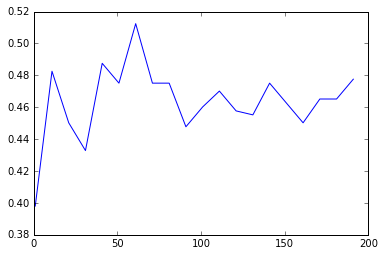

In [60]:
x_axis = np.arange(1,201,10)
plt.plot(x_axis, y_score_rf_l)
plt.show()